<a href="https://colab.research.google.com/github/kngoran/FirstMLapp/blob/main/DEEP_LEARNING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot as plt  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import ngrams

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Data Collection 

**We can find the dataset for this project on Kaggle Website:Url Fake Job_posting: <font color='red'> https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction/code </font>.
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs.**


Import the data set 

In [5]:
from google.colab import files
upload= files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


In [9]:
data= pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
# Check the shape of the data 
data.shape

(17880, 18)

In [11]:
# Check the columns of the data set 
data.columns



Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [12]:
# Check the  different dypte 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [13]:
# Summary statistic of object variables 
data.describe(include=['object'])

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


In [14]:
# Check the percentage  of the NAN in each variable 
round(data.isnull().sum()/17880,2)

job_id                 0.00
title                  0.00
location               0.02
department             0.65
salary_range           0.84
company_profile        0.19
description            0.00
requirements           0.15
benefits               0.40
telecommuting          0.00
has_company_logo       0.00
has_questions          0.00
employment_type        0.19
required_experience    0.39
required_education     0.45
industry               0.27
function               0.36
fraudulent             0.00
dtype: float64

**84% of  columns of of the salary variable is null, 65% of the columns of department variable are nul. Percentage of NAN in the benefits and required_education variables are respectively 40% and 45%**

**We will use the description column to predict if the the job_posted is fraudulent.Therefore, we will drop the unnecessary variables**

In [16]:
# Create a list of the features to drop 
feature_to_drop= ['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']

In [17]:
# drop the features 
data.drop(feature_to_drop, axis=1, inplace= True)
data.columns

Index(['description', 'fraudulent'], dtype='object')

In [18]:
#Distribution of labels of fraudulent variable
data.fraudulent.value_counts()/data.shape[0]

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

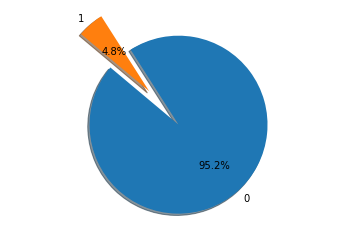

In [21]:
# Visualization of the distribution 
s=data.fraudulent.value_counts()/data.shape[0]
plt.pie(s, labels=[0,1], 
        autopct='%1.1f%%', shadow=True,explode = [0, 0.5], startangle=140)
plt.axis('equal')
plt.show()

**<font color='red'>4.8%</font> of the job description is fraudulent**

In [22]:
# Check the  different sentence in the  description  variables 
data.description.nunique()

14801

**The description column contains <font color='red'> 14801 </font> unique sentences** 

In [69]:
y= data['fraudulent']

### 3. Text-preprocessing 

In [25]:
data.description.unique()

array(['Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff',
       "Organised - Focused - Vibrant - Awesome!Do you have a passion for customer s

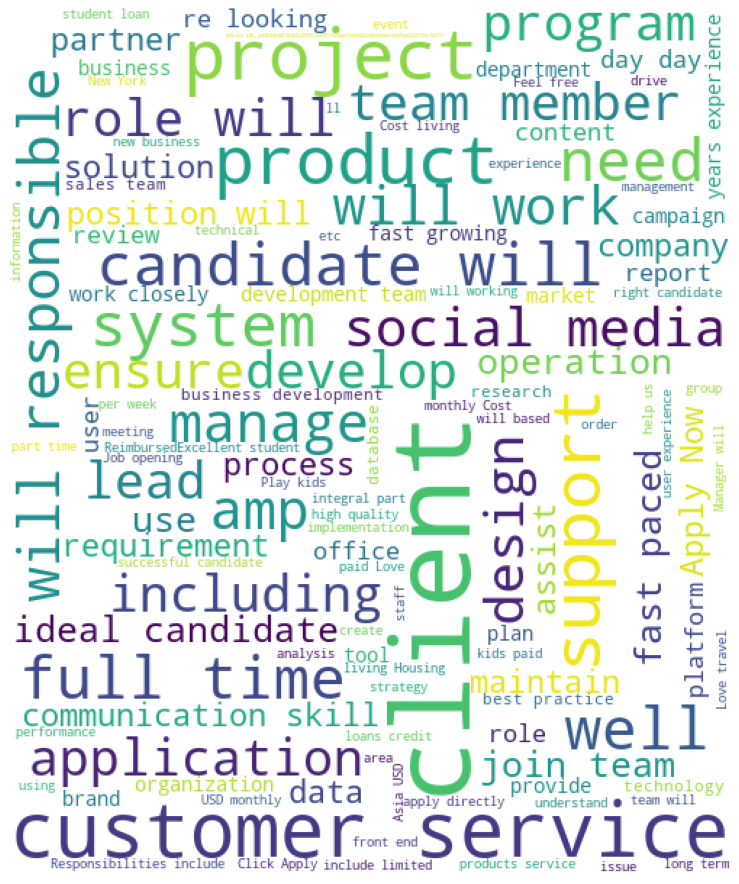

In [26]:
data['description'] = data['description'].astype('str')
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(data['description'])
wordcloud = WordCloud(background_color='white',width=500, height=600).generate(text=target_text)
plt.figure(figsize=(15,16))
plt.imshow(wordcloud )
plt.axis("off")
plt.show()

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
text_list=[]  
for index, row in data.iterrows(): 
    text_list.append((row['description'])) 
text_list

total_words=''.join(text_list)
total_words=word_tokenize(total_words)

In [31]:
freq_words=FreqDist(total_words)
word_frequency=FreqDist(freq_words)

In [32]:
# print the fifteen most common  words 
print(word_frequency.most_common(30))

[('and', 174716), (',', 159448), ('to', 96882), ('the', 89035), ('.', 71097), ('of', 67436), ('a', 61799), ('in', 52353), ('for', 46381), ('with', 40766), ('is', 28866), ('our', 27344), ('are', 22721), ('will', 22441), (':', 22139), ('you', 22135), ('be', 21077), ('on', 18689), ('as', 18273), (';', 18228), ('team', 16461), ('’', 16262), (')', 15368), ('that', 14723), ('(', 14688), ('an', 14412), ('#', 13390), ('We', 13231), ('work', 13134), ('all', 11657)]


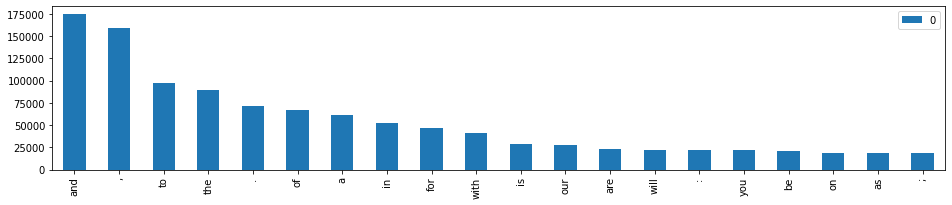

In [33]:
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,3),grid=False)

In [34]:
data['description'] = data['description'].str.lower()
data.description[0]

'food52, a fast-growing, james beard award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its new york city headquarters.reproducing and/or repackaging existing food52 content for a number of partner sites, such as huffington post, yahoo, buzzfeed, and more in their various content management systemsresearching blogs and websites for the provisions by food52 affiliate programassisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriessupporting with pr &amp; events when neededhelping with office administrative work, such as filing, mailing, and preparing for meetingsworking with developers to document bugs and suggest improvements to the sitesupporting the marketing and executive staff'

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
stemming = PorterStemmer()
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') 
stops = set(stopwords.words("english"))   
def define_tokens(row):
    review = row
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stops]
    lemmatize_list = [lemmatizer.lemmatize(word) for word in meaningful_words]
    joined_words = (' '.join(lemmatize_list))
    return joined_words

In [ ]:
nltk.download('wordnet')
data['description'] = data['description'].apply(define_tokens)

In [45]:
data['description'][0]

'james beard online food community curated recipe hub currently interviewing unpaid intern work small team editor executive developer new york city repackaging existing content number partner site huffington post yahoo buzzfeed various content management systemsresearching blog website provision affiliate programassisting affiliate program support screening affiliate assisting affiliate inquiriessupporting pr amp event neededhelping office administrative work filing mailing preparing meetingsworking developer document bug suggest improvement sitesupporting marketing executive staff'

Embedding 

In [51]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [52]:
corpus= data['description']

In [53]:

##tensorflow >2.0
from tensorflow.keras.preprocessing.text import one_hot

In [54]:
### Vocabulary size
voc_size=50000

In [55]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[33705,
  28431,
  6090,
  650,
  6824,
  35655,
  15654,
  38035,
  5765,
  1724,
  17507,
  12661,
  43058,
  33122,
  42967,
  44722,
  44266,
  24303,
  32025,
  37081,
  2805,
  41097,
  21697,
  8144,
  27091,
  18310,
  26461,
  12208,
  27522,
  17556,
  24321,
  7966,
  8144,
  19725,
  40598,
  40084,
  32628,
  43600,
  33749,
  2756,
  33749,
  4929,
  41427,
  37933,
  33749,
  22310,
  33749,
  21749,
  41612,
  23514,
  19915,
  2898,
  41789,
  18359,
  43058,
  9053,
  21254,
  28817,
  44172,
  24303,
  35623,
  16647,
  1771,
  40897,
  33550,
  39310,
  44266,
  44537],
 [33559,
  36885,
  978,
  9024,
  9101,
  36221,
  35302,
  22027,
  11160,
  21753,
  47285,
  25711,
  19725,
  11640,
  13267,
  39255,
  26098,
  28519,
  13915,
  49248,
  31341,
  3696,
  29640,
  43790,
  35302,
  38225,
  18697,
  25058,
  46324,
  43117,
  30425,
  7921,
  23675,
  48282,
  45505,
  26733,
  1091,
  36221,
  6653,
  30193,
  5678,
  5834,
  18158,
  43781,
  12124,
  42043

In [63]:
sent_length=100
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ... 39310 44266 44537]
 [29640 43790 35302 ...  7472 45966  8249]
 [    0     0     0 ... 22119 24501 48706]
 ...
 [22798 29066 28524 ...  9485  4574 43461]
 [    0     0     0 ... 48878 16961 43781]
 [17846 32025 39319 ...  3471  3683  8866]]


In [66]:
embedded_docs[]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0, 46143, 43690,
       16873, 41939, 27768, 42158, 43719, 35453, 15317, 36333, 22626,
        3884, 21753, 40170, 39015, 22626, 11462, 24501,  2222, 15530,
        3243, 27430, 12847,   910, 28543, 12794,  6411, 22119, 24501,
       48706], dtype=int32)

In [67]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 40)           2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,056,501
Trainable params: 2,056,501
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
len(embedded_docs),y.shape

(17880, (17880,))

In [71]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [72]:
X_final.shape,y_final.shape

((17880, 100), (17880,))

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [74]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
188/188 [==============================] - 10s 13ms/step - loss: 0.2128 - accuracy: 0.9503 - val_loss: 0.1557 - val_accuracy: 0.9527
Epoch 2/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0998 - accuracy: 0.9697 - val_loss: 0.1447 - val_accuracy: 0.9680
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0517 - accuracy: 0.9838 - val_loss: 0.1383 - val_accuracy: 0.9714
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0276 - accuracy: 0.9918 - val_loss: 0.1525 - val_accuracy: 0.9719
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.1586 - val_accuracy: 0.9736
Epoch 6/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.1641 - val_accuracy: 0.9702
Epoch 7/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.1786 - val_accuracy: 0.970

In [76]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
y_pred=model.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test,y_pred)

ValueError: ignored

In [75]:
y_pred=model.predict_classes(X_test)

AttributeError: ignored